In [1]:
"""
1. Data cleaning
2. Feature engineering and dimentionality reduction
"""

'\n1. Data cleaning\n2. Feature engineering and dimentionality reduction\n'

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20, 10)

In [3]:
file_path = "Bengaluru_House_Data.csv"
df = pd.read_csv(file_path)

In [4]:
df.head()

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00

### Data Cleaning

In [5]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
df1 = df.drop(['area_type', 'society', 'balcony', 'availability'], axis='columns') # or axis=1

df1

location       size   total_sqft  bath   price
0      Electronic City Phase II      2 BHK         1056   2.0   39.07
1              Chikka Tirupathi  4 Bedroom         2600   5.0  120.00
2                   Uttarahalli      3 BHK         1440   2.0   62.00
3            Lingadheeranahalli      3 BHK         1521   3.0   95.00
4                      Kothanur      2 BHK         1200   2.0   51.00
5                    Whitefield      2 BHK         1170   2.0   38.00
6              Old Airport Road      4 BHK         2732   4.0  204.00
7                  Rajaji Nagar      4 BHK         3300   4.0  600.00
8                  Marathahalli      3 BHK         1310   3.0   63.25
9                  Gandhi Bazar  6 Bedroom         1020   6.0  370.00
10                   Whitefield      3 BHK         1800   2.0   70.00
11                   Whitefield  4 Bedroom         2785   5.0  295.00
12           7th Phase JP Nagar      2 BHK         1000   2.0   38.00
13                    Gottigere      2 BHK         1100   2.0   40.00
14                     Sarjapur  3 Bedroom         2250   3.0  148.00
15                  Mysore Road      2 BHK         1175   2.0   73.50
16                Bisuvanahalli      3 BHK         1180   3.0   48.00
17        Raja Rajeshwari Nagar      3 BHK         1540   3.0   60.00
18        Ramakrishnappa Layout      3 BHK         2770   4.0  290.00
19           Manayata Tech Park      2 BHK         1100   2.0   48.00
20                      Kengeri      1 BHK          600   1.0   15.00
21                   Binny Pete      3 BHK         1755   3.0  122.00
22                  Thanisandra  4 Bedroom         2800   5.0  380.00
23                    Bellandur      3 BHK         1767   3.0  103.00
24                  Thanisandra       1 RK          510   1.0   25.25
25              Mangammanapalya      3 BHK         1250   3.0   56.00
26              Electronic City      2 BHK          660   1.0   23.10
27                   Whitefield      3 BHK         1610   3.0   81.00
28             Ramagondanahalli      2 BHK         1151   2.0   48.77
29              Electronic City      3 BHK         1025   2.0   47.00
...                         ...        ...          ...   ...     ...
13290            Sarjapur  Road      4 BHK         4050   2.0  450.00
13291            Weavers Colony  1 Bedroom          812   1.0   26.00
13292          Udayapur Village      3 BHK         1440   2.0   63.93
13293            Sarjapur  Road      4 BHK         2425   5.0  195.00
13294             Sultan Palaya      4 BHK         2200   3.0   80.00
13295              Haralur Road      3 BHK         1810   3.0  112.00
13296                  Cox Town      2 BHK         1200   2.0  140.00
13297           Electronic City      2 BHK         1060   2.0   52.00
13298             Kenchenahalli      2 BHK         1015   2.0   60.00
13299                Whitefield      4 BHK  2830 - 2882   5.0  154.50
13300             Hosakerehalli  5 Bedroom         1500   6.0  145.00
13301                  Kothanur      3 BHK         1454   3.0   71.50
13302      Annaiah Reddy Layout      2 BHK         1075   2.0   48.00
13303            Vidyaranyapura  5 Bedroom          774   5.0   70.00
13304     Raja Rajeshwari Nagar      2 BHK         1187   2.0   40.14
13305                  Hulimavu      1 BHK          500   1.0  220.00
13306     Rajarajeshwari Nagara  4 Bedroom         1200   5.0  325.00
13307              Billekahalli      3 BHK         1805   3.0  134.00
13308         Bannerghatta Road      3 BHK         1527   3.0  142.00
13309              Yeshwanthpur      3 BHK         1675   3.0   92.13
13310              Rachenahalli      2 BHK         1050   2.0   52.71
13311          Ramamurthy Nagar  7 Bedroom         1500   9.0  250.00
13312                 Bellandur      2 BHK         1262   2.0   47.00
13313               Uttarahalli      3 BHK         1345   2.0   57.00
13314         Green Glen Layout      3 BHK         1715   3.0  112.00
13315                Whitefield  

In [7]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
df1 = df1.dropna()

In [9]:
df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [10]:
df1['bhk'] = df1['size'].apply(lambda x: int(x.split(' ')[0]))

/home/taranjeet/MachineLearning/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
df1[df1['bhk']>20]

location        size total_sqft  bath  price  bhk
1718  2Electronic City Phase II      27 BHK       8000  27.0  230.0   27
4684                Munnekollal  43 Bedroom       2400  40.0  660.0   43

In [12]:
df1.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [13]:
def is_float(x):
    try:

        float(x)
    except Exception:
        return False
    return True

In [14]:
df1[~df1['total_sqft'].apply(is_float)]

location       size       total_sqft  bath    price  \
30                    Yelahanka      4 BHK      2100 - 2850   4.0  186.000   
122                      Hebbal      4 BHK      3067 - 8156   4.0  477.000   
137          8th Phase JP Nagar      2 BHK      1042 - 1105   2.0   54.005   
165                    Sarjapur      2 BHK      1145 - 1340   2.0   43.490   
188                    KR Puram      2 BHK      1015 - 1540   2.0   56.800   
410                     Kengeri      1 BHK   34.46Sq. Meter   1.0   18.500   
549                 Hennur Road      2 BHK      1195 - 1440   2.0   63.770   
648                     Arekere  9 Bedroom        4125Perch   9.0  265.000   
661                   Yelahanka      2 BHK      1120 - 1145   2.0   48.130   
672                Bettahalsoor  4 Bedroom      3090 - 5002   4.0  445.000   
772       Banashankari Stage VI      2 BHK      1160 - 1195   2.0   59.935   
775                Basavanagara      1 BHK    1000Sq. Meter   2.0   93.000   
850           Bannerghatta Road      2 BHK      1115 - 1130   2.0   58.935   
872           Singapura Village      2 BHK    1100Sq. Yards   2.0   45.000   
886                  Chandapura      1 BHK        520 - 645   1.0   15.135   
927                 Thanisandra      2 BHK      1000 - 1285   2.0   43.415   
959                 Kammasandra      1 BHK        650 - 665   1.0   18.410   
990                    Sarjapur      1 BHK        633 - 666   1.0   17.535   
1019             Marathi Layout  1 Bedroom        5.31Acres   1.0  110.000   
1086                 Narasapura  2 Bedroom          30Acres   2.0   29.500   
1178                  Yelahanka      3 BHK      1445 - 1455   3.0   65.255   
1183                Magadi Road      2 BHK       884 - 1116   2.0   46.500   
1187                Thanisandra      2 BHK       850 - 1093   2.0   36.435   
1400                 Chamrajpet      9 BHK     716Sq. Meter   9.0  296.000   
1484                     Hebbal      2 BHK  547.34 - 827.31   2.0   42.720   
1542             Sarjapur  Road      1 BHK        580 - 650   1.0   17.835   
1614             Sarjapur  Road      4 BHK      3425 - 3435   6.0  228.500   
1643             Talaghattapura      3 BHK      1804 - 2273   3.0  120.000   
1683            Old Madras Road      4 BHK      3630 - 3800   6.0  224.500   
1694                   JP Nagar      4 BHK      4000 - 5249   4.0  314.500   
...                         ...        ...              ...   ...      ...   
11320             Arishinakunte  1 Bedroom         38Guntha   1.0  170.000   
11373                   Hoskote      2 BHK       929 - 1078   2.0   28.095   
11389  Electronic City Phase II      4 BHK      2150 - 2225   4.0  105.000   
11407                Whitefield      3 BHK      1520 - 1759   3.0   92.630   
11490                  Sarjapur  4 Bedroom      2580 - 2591   4.0  115.000   
11498                 Yelahanka      1 BHK       629 - 1026   1.0   42.535   
11583              Bommanahalli      2 BHK      1215 - 1495   2.0   73.170   
11615                     arudi  3 Bedroom           6Acres   2.0   80.000   
11650                 Yelahanka      2 BHK      1140 - 1250   2.0   53.105   
11764                Begur Road      4 BHK      2400 - 2600   6.0  122.500   
11827               Magadi Road      3 BHK      1052 - 1322   2.0   55.195   
11921                      ITPL      4 BHK      5666 - 5669   5.0  300.000   
11969               Thanisandra      1 BHK        620 - 934   1.0   38.460   
12161                Kanakapura      1 BHK        712 - 938   1.0   35.475   
12184                    Hennur      3 BHK      1783 - 1878   3.0   84.205   
12186        7th Phase JP Nagar      2 BHK     120Sq. Yards   2.0   51.000   
12252              Gowdanapalya      5 BHK      24Sq. Meter   5.0   75.000   
12280                Whitefield      4 BHK      2528 - 3188   4.0  137.000   
12334                  Budigere      1 BHK        650 - 760   1.0   34.545   
12435     Banashankari Stage VI      3 BHK   

In [15]:
def convert_sqft_to_num(x):
    tokens = x.split("-")
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except Exception:
        return None

In [16]:
df1['total_sqft'] = df1['total_sqft'].apply(convert_sqft_to_num)

/home/taranjeet/MachineLearning/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
df1.head()

location       size  total_sqft  bath   price  bhk
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2

### Feature Engineering and Dimentionality Reduction

In [18]:
df1['price_per_sqft'] = df1['price']*100000 / df1['total_sqft']

/home/taranjeet/MachineLearning/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
df1.head()

location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0     3699.810606  
1     4615.384615  
2     4305.555556  
3     6245.890861  
4     4250.000000

In [20]:
df1.location = df1.location.apply(lambda x: x.strip())
location_stats = df1.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

/home/taranjeet/MachineLearning/venv/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


location
Whitefield                                      535
Sarjapur  Road                                  392
Electronic City                                 304
Kanakpura Road                                  266
Thanisandra                                     236
Yelahanka                                       210
Uttarahalli                                     186
Hebbal                                          176
Marathahalli                                    175
Raja Rajeshwari Nagar                           171
Bannerghatta Road                               152
Hennur Road                                     150
7th Phase JP Nagar                              149
Haralur Road                                    141
Electronic City Phase II                        131
Rajaji Nagar                                    106
Chandapura                                       98
Bellandur                                        96
Hoodi                                            88
KR 

In [21]:
other_locations = location_stats[location_stats<=10]

In [22]:
df1.location = df1.location.apply(lambda x: 'other' if x in other_locations else x)

In [23]:
len(df1.location.unique())

242

### Outlier detection and removal

In [24]:
df1 = df1[~(df1.total_sqft/df1.bhk<300)]

In [25]:
df1.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [26]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

In [27]:
df1 = remove_pps_outliers(df1)

In [28]:
df1.shape

(10241, 7)

In [40]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color="blue", label="2 BHK", s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, color="green", marker="+", label="3 BHK", s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()


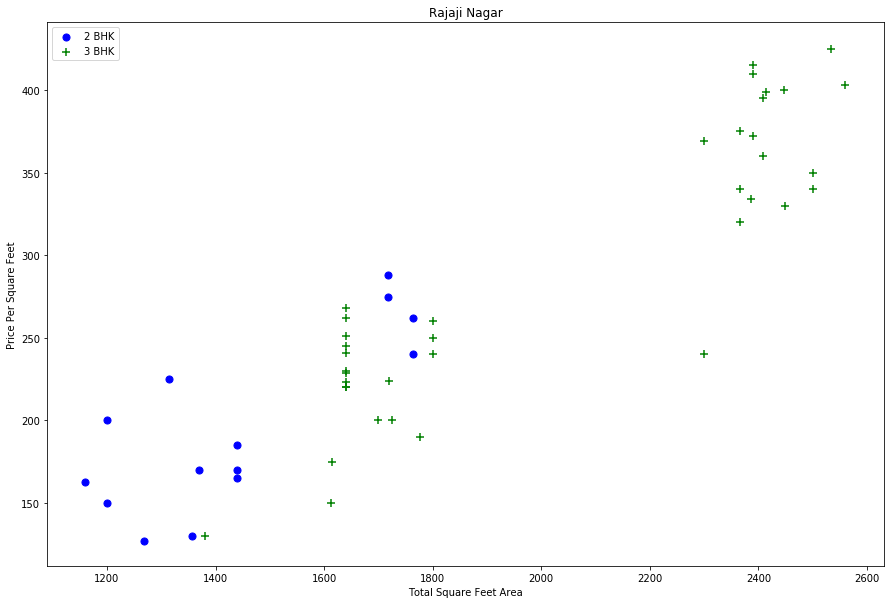

In [43]:
plot_scatter_chart(df1, "Rajaji Nagar")

In [38]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
            
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

In [39]:
df2 = remove_bhk_outliers(df1)

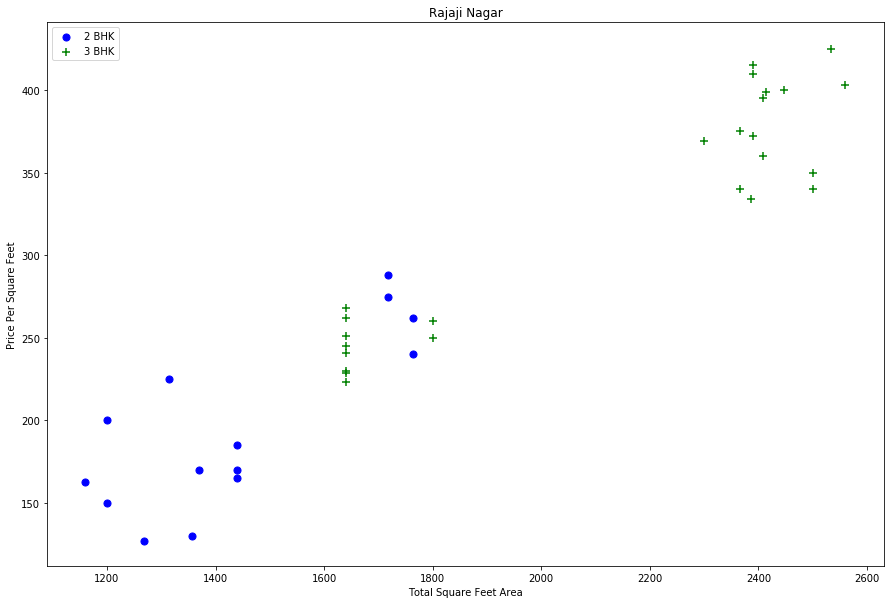

In [44]:
plot_scatter_chart(df2, "Rajaji Nagar")

Text(0, 0.5, 'Count')

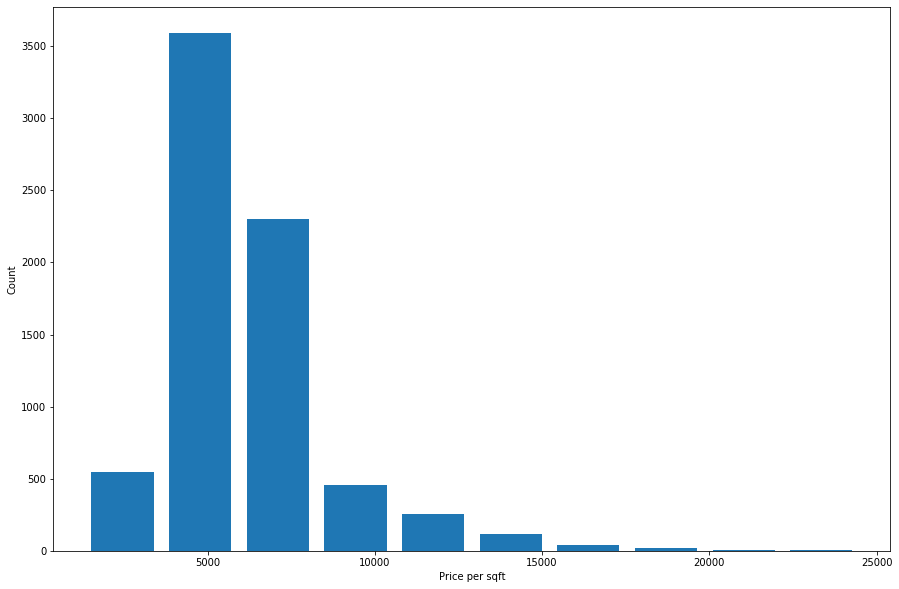

In [45]:
plt.hist(df2.price_per_sqft, rwidth=0.8)
plt.xlabel("Price per sqft")
plt.ylabel("Count")

In [47]:
df2.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

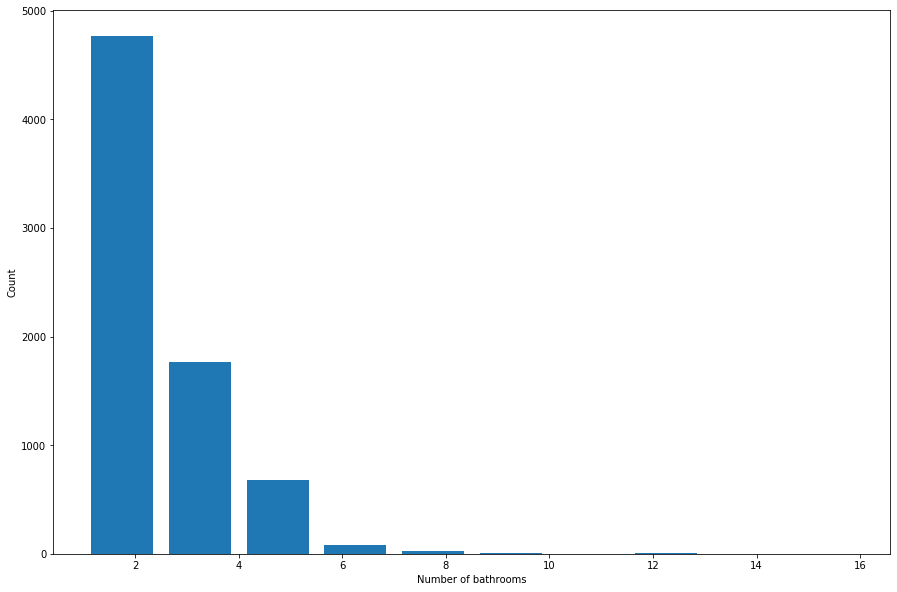

In [50]:
plt.hist(df2.bath, rwidth=0.8)
plt.xlabel('Number of bathrooms')
plt.ylabel('Count')

In [52]:
df2 = df2[df2.bath<df2.bhk+2]

In [53]:
df2 = df2.drop(['size', 'price_per_sqft'], axis='columns')
df2.head()

location  total_sqft  bath  price  bhk
0  1st Block Jayanagar      2850.0   4.0  428.0    4
1  1st Block Jayanagar      1630.0   3.0  194.0    3
2  1st Block Jayanagar      1875.0   2.0  235.0    3
3  1st Block Jayanagar      1200.0   2.0  130.0    3
4  1st Block Jayanagar      1235.0   2.0  148.0    2

## Building ML model

In [55]:
# ML model cannot work with categorical values so converting
# them to numerical data
dummies = pd.get_dummies(df2.location)

In [56]:
dummies.head()

1st Block Jayanagar  1st Phase JP Nagar  2nd Phase Judicial Layout  \
0                    1                   0                          0   
1                    1                   0                          0   
2                    1                   0                          0   
3                    1                   0                          0   
4                    1                   0                          0   

   2nd Stage Nagarbhavi  5th Block Hbr Layout  5th Phase JP Nagar  \
0                     0                     0                   0   
1                     0                     0                   0   
2                     0                     0                   0   
3                     0                     0                   0   
4                     0                     0                   0   

   6th Phase JP Nagar  7th Phase JP Nagar  8th Phase JP Nagar  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   9th Phase JP Nagar  ...  Vishveshwarya Layout  Vishwapriya Layout  \
0                   0  ...                     0                   0   
1                   0  ...                     0                   0   
2                   0  ...                     0                   0   
3                   0  ...                     0                   0   
4                   0  ...                     0                   0   

   Vittasandra  Whitefield  Yelachenahalli  Yelahanka  Yelahanka New Town  \
0            0           0               0          0                   0   
1            0           0               0          0                   0   
2            0           0               0          0                   0   
3            0           0               0          0                   0   
4            0           0               0          0                   0   

   Yelenahalli  Yeshwanthpur  other  
0            0             0      0  
1            0             0      0  
2            0             0      0  
3            0             0      0  
4            0             0      0  

[5 rows x 242 columns]

In [57]:
df2 = pd.concat([df2, dummies.drop('other', axis=1)], axis=1)

In [58]:
df2.head()

location  total_sqft  bath  price  bhk  1st Block Jayanagar  \
0  1st Block Jayanagar      2850.0   4.0  428.0    4                    1   
1  1st Block Jayanagar      1630.0   3.0  194.0    3                    1   
2  1st Block Jayanagar      1875.0   2.0  235.0    3                    1   
3  1st Block Jayanagar      1200.0   2.0  130.0    3                    1   
4  1st Block Jayanagar      1235.0   2.0  148.0    2                    1   

   1st Phase JP Nagar  2nd Phase Judicial Layout  2nd Stage Nagarbhavi  \
0                   0                          0                     0   
1                   0                          0                     0   
2                   0                          0                     0   
3                   0                          0                     0   
4                   0                          0                     0   

   5th Block Hbr Layout  ...  Vijayanagar  Vishveshwarya Layout  \
0                     0  ...            0                     0   
1                     0  ...            0                     0   
2                     0  ...            0                     0   
3                     0  ...            0                     0   
4                     0  ...            0                     0   

   Vishwapriya Layout  Vittasandra  Whitefield  Yelachenahalli  Yelahanka  \
0                   0            0           0               0          0   
1                   0            0           0               0          0   
2                   0            0           0               0          0   
3                   0            0           0               0          0   
4                   0            0           0               0          0   

   Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0                   0            0             0  
1                   0            0             0  
2                   0            0             0  
3                   0            0             0  
4                   0            0             0  

[5 rows x 246 columns]

In [60]:
df2.drop('location', axis=1)

total_sqft  bath   price  bhk  1st Block Jayanagar  1st Phase JP Nagar  \
0          2850.0   4.0  428.00    4                    1                   0   
1          1630.0   3.0  194.00    3                    1                   0   
2          1875.0   2.0  235.00    3                    1                   0   
3          1200.0   2.0  130.00    3                    1                   0   
4          1235.0   2.0  148.00    2                    1                   0   
5          2750.0   4.0  413.00    4                    1                   0   
6          2450.0   4.0  368.00    4                    1                   0   
8          1875.0   3.0  167.00    3                    0                   1   
9          1500.0   5.0   85.00    5                    0                   1   
10         2065.0   4.0  210.00    3                    0                   1   
12         2059.0   3.0  225.00    3                    0                   1   
13         1394.0   2.0  100.00    2                    0                   1   
14         1077.0   2.0   93.00    2                    0                   1   
15         1566.0   2.0  180.00    2                    0                   1   
16          840.0   2.0   50.00    1                    0                   1   
17         1590.0   3.0  131.00    3                    0                   1   
18         2180.0   3.0  210.00    3                    0                   1   
19         1180.0   2.0   88.50    2                    0                   1   
20         1200.0   2.0   86.00    2                    0                   1   
21         1394.0   2.0   85.00    2                    0                   1   
22         2077.0   3.0  175.00    3                    0                   1   
24         1205.0   2.0   85.00    2                    0                   1   
26          900.0   2.0   75.00    2                    0                   1   
27         1450.0   2.0   50.75    3                    0                   0   
28         1150.0   2.0   40.25    2                    0                   0   
29         1350.0   2.0   47.25    3                    0                   0   
30         1350.0   2.0   47.25    3                    0                   0   
31          900.0   2.0   41.00    2                    0                   0   
32         1681.0   3.0   69.00    3                    0                   0   
33         1350.0   2.0   47.25    3                    0                   0   
...           ...   ...     ...  ...                  ...                 ...   
10174       600.0   3.0   72.00    2                    0                   0   
10175      1200.0   3.0   75.00    3                    0                   0   
10176       450.0   1.0   20.00    1                    0                   0   
10178      1719.0   3.0   95.00    3                    0                   0   
10181       540.0   1.0   22.50    1                    0                   0   
10184      1500.0   3.0   85.00    3                    0                   0   
10185      1360.0   2.0   73.00    3                    0                   0   
10187      1182.0   2.0   64.00    2                    0                   0   
10188      1350.0   1.0  120.00    3                    0                   0   
10189      1500.0   3.0   90.00    3                    0                   0   
10190      2292.0   2.0  285.00    3                    0                   0   
10191      1945.0   3.0  135.00    3                    0                   0   
10193      1075.0   2.0   58.00    2                    0                   0   
10199      1035.0   2.0   60.00    2                    0                   0   
10200      1232.0   2.0   94.28    2                    0                   0   
10206      2700.0   3.0  230.00    4                    0                   0   
10211      2872.0   4.0  183.00    4                    0                   0   
10214      1100.0   2.0   64.08    2  

In [61]:
X = df2.drop('price', axis=1) # Independent variables
y = df2.price # Dependent variable

In [66]:


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)



In [67]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Thanisandra'